In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
area = pd.Series(["2600", "3000", "3200", "3600", "4000"])
price = pd.Series(["550000", "565000", "610000", "680000", "725000"])

In [3]:
df = pd.DataFrame({"Area": area,
                     "Price": price})

In [4]:
df = pd.read_csv("data.csv")

[Text(0.5, 1.0, 'Area vs Prices'),
 Text(0.5, 0, 'Area'),
 Text(0, 0.5, 'Prices'),
 None]

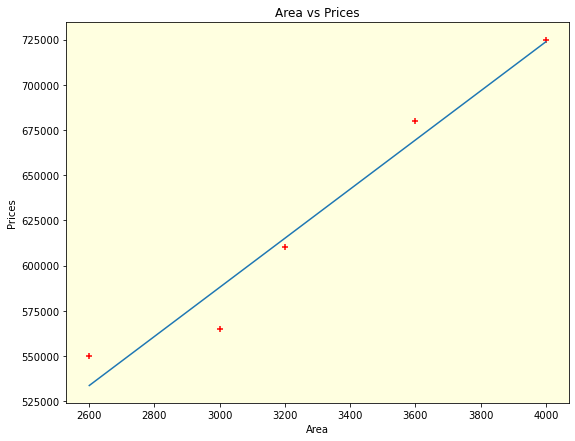

In [13]:
fig, ax = plt.subplots(figsize = (9,7))
ax.scatter(df["Area"], df["Price"], color = "red", marker = "+")
ax.plot(df.Area, rg.predict(df[["Area"]]))
ax.set(title = "Area vs Prices",
      xlabel = "Area",
      ylabel = "Prices",
      facecolor = "lightyellow")

In [7]:
rg = linear_model.LinearRegression()

In [8]:
rg.fit(df[["Area"]], df.Price)

LinearRegression()

In [9]:
rg.predict([[3000]])

array([587979.45205479])

In [10]:
rg.coef_

array([135.78767123])

In [11]:
rg.intercept_

180616.43835616432

In [14]:
df["Area"].dtype

dtype('int64')

In [15]:
canada = pd.read_csv("canada/canada_per_capita_income.csv")
canada.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


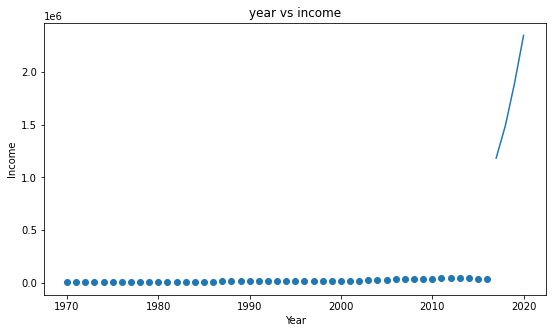

In [27]:
fig, ax = plt.subplots(figsize = (9, 5))
ax.scatter(canada["year"], canada["per capita income (US$)"])
ax.set(title = "year vs income",
       xlabel = "Year",
       ylabel = "Income")
ax.plot(canada1["year"], lin_reg.predict(canada[["per capita income (US$)"]][:4]))

In [17]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(canada[["year"]], canada["per capita income (US$)"])

LinearRegression()

In [18]:
lin_reg.predict([[2020]])

array([41288.69409442])

In [19]:
canada1 = pd.read_csv("data1.csv")
canada1

,year
0,2017
1,2018
2,2019
3,2020


In [20]:
lin_reg.predict(canada1)

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442])

In [21]:
# Multi-linear regression
house = pd.read_csv("canada/homeprices.csv")

In [22]:
house


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [23]:
house["bedrooms"].isna().sum()

1

In [24]:
def fill_miss(column):
    for i, j in column.items():
        if j == "Nan":
            miss = i.fillna(i.mean(), inplace = True)
    column.fillna(3)

In [25]:
fill_miss(house["bedrooms"])

In [28]:
house

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [29]:
house.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [30]:
import math
# Lets fill the missing values
house["bedrooms"].fillna(math.floor(house["bedrooms"].mean()), inplace = True)

In [31]:
house

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [32]:
# Now we dont have anymore missing values, lets build multilinear regression model
multi_lin_reg = linear_model.LinearRegression()
multi_lin_reg.fit(house[["area", "bedrooms", "age"]], house["price"])

LinearRegression()

# Before to predict lets see the equation
**y = m1x1+ m2x2+ m3x3 + b**                                                                                         
`Where`                                                                                         
    `y` = Dependent Variable                                                                                         
    `m1,m2,m3`  = Cofficients                                                                                        
    `x1,x2,x3` = Features(independent Variables)                                                                                         
    `b` = intercept                                                                                        

In [33]:
multi_lin_reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [34]:
multi_lin_reg.intercept_

221323.0018654043

# Lets predict the price of House with following Features
--> Area = 2000 sq ft                                                         
--> Bedrooms = 3                                                        
--> House_Age = 5                                                        

In [35]:
multi_lin_reg.predict([[2000, 3, 5]])

array([499455.93644033])

# New DataSet

In [36]:
hiring = pd.read_csv("canada/hiring.csv")
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [37]:
hiring.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [38]:
# Lets fill the missing values First
hiring["experience"].fillna("zero", inplace = True)
hiring["test_score(out of 10)"].fillna(math.floor(hiring["test_score(out of 10)"].mean()), inplace = True)

In [39]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [51]:
# Lets Convert Strings into numerical vales
for label, content in hiring.items():
    if not pd.api.types.is_numeric_dtype(content):
        hiring[label] = pd.Categorical(content).codes

In [52]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6,8.0,9,50000
1,6,8.0,6,45000
2,1,6.0,7,60000
3,5,10.0,10,65000
4,2,9.0,6,70000
5,4,7.0,10,62000
6,3,7.0,7,72000
7,0,7.0,8,80000


In [41]:
dg = pd.read_csv("DJI Sample Flight Log (1) (1).csv")
dg.T.head(230)

,0,1,2,3,4
CUSTOM.updateTime,10:57.5,10:57.5,10:57.6,10:57.7,10:57.8
CUSTOM.isPhoto,NaN,NaN,NaN,NaN,NaN
CUSTOM.isVideo,NaN,NaN,NaN,NaN,NaN
CUSTOM.hSpeed [m/s],2.42,2.42,2.33,2.33,2.33
CUSTOM.distance [m],0,0,0.45,0.7,0.93
...,...,...,...,...,...
HOME.motor6EscmState,NaN,NaN,NaN,NaN,NaN
HOME.motor7EscmState,NaN,NaN,NaN,NaN,NaN
HOME.motor8EscmState,NaN,NaN,NaN,NaN,NaN
HOME.forceLandingHeight [m],NaN,NaN,NaN,NaN,NaN


# Gradiant Descent

In [42]:
test_score = pd.read_csv("canada/test_scores.csv")
test_score

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [43]:
# Now we will have to make a function for gradiant decent 
import math
def gradiant_decent(x,y):
    m_cur = b_cur = 0
    iterations = 1000
    learning_rate = 0.001
    n = len(x)
    for i in range(iterations+1):
        y_predict = m_cur* x + b_cur
        md = -(2/n) * sum( x*(y - y_predict))
        bd = -(2/n) * sum(y - y_predict)
        
        cost = (1/n)*sum([var**2 for var in (y-y_predict)] )
        
        m_cur = m_cur - learning_rate*md
        b_cur = b_cur - learning_rate*bd
        
        
        print(f"m = {m_cur}, b = {b_cur}, cost = {cost}, iteration = {i}, math = {math.isclose(m_cur, b_cur, rel_tol=1e-20)}")
        
        


x = test_score["math"]
y = test_score["cs"]
gradiant_decent(x,y)

m = 9.891800000000002, b = 0.1398, cost = 5199.1, iteration = 0, math = False
m = -73.89063968000005, b = -1.0422240800000002, cost = 370727.6662565042, iteration = 1, math = False
m = 635.7369779473285, b = 8.971449829408007, cost = 26593365.21283422, iteration = 2, math = False
m = -5374.727514955187, b = -75.84115332401389, cost = 1907777992.8722565, iteration = 3, math = False
m = 45533.21677472461, b = 642.5139249806472, cost = 136861998255.80414, iteration = 4, math = False
m = -385651.2277087454, b = -5441.869063972523, cost = 9818336798225.717, iteration = 5, math = False
m = 3266431.5217446033, b = 46092.15849604381, cost = 704357226503460.2, iteration = 6, math = False
m = -27666290.14670837, b = -390395.13732602727, cost = 5.052985171774353e+16, iteration = 7, math = False
m = 234330311.64447328, b = 3306602.156348863, cost = 3.6249587830483005e+18, iteration = 8, math = False
m = -1984750831.161688, b = -28006540.543865472, cost = 2.6005075677245276e+20, iteration = 9, math

m = 1.0783637599090045e+77, b = 1.5216639736889034e+75, cost = 7.676737758184881e+155, iteration = 82, math = False
m = -9.133617261978298e+77, b = -1.2888319186642775e+76, cost = 5.507211483052723e+157, iteration = 83, math = False
m = 7.736068976886559e+78, b = 1.0916258407176056e+77, cost = 3.950815994297939e+159, iteration = 84, math = False
m = -6.552361621750738e+79, b = -9.245945564084275e+77, cost = 2.8342741274479203e+161, iteration = 85, math = False
m = 5.549775079625887e+80, b = 7.831209759363375e+78, cost = 2.0332786546157922e+163, iteration = 86, math = False
m = -4.700595787051052e+81, b = -6.632944772395721e+79, cost = 1.4586528689230229e+165, iteration = 87, math = False
m = 3.9813506738964224e+82, b = 5.618028083215113e+80, cost = 1.0464223323189359e+167, iteration = 88, math = False
m = -3.3721583192074084e+83, b = -4.758405297620753e+81, cost = 7.506924511685083e+168, iteration = 89, math = False
m = 2.8561793876525963e+84, b = 4.030314665758547e+82, cost = 5.385389

OverflowError: (34, 'Result too large')

## Building a logistic Regression Model


In [44]:
hr = pd.read_csv("canada/HR_comma_sep.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [45]:
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [53]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [47]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [55]:
# Converting Object data type into numeric for Machines to learn and Understand
for label, content in hr.items():
    if not pd.api.types.is_numeric_dtype(content):
        hr[label] = pd.Categorical(content).codes

In [64]:
# Converting Floats to Categorical Values
for label, content in hr.items():
    if pd.api.types.is_float_dtype(content):
        hr[label] = pd.Categorical(content).codes

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = hr.drop(["satisfaction_level"], axis = "columns")
Y = hr["satisfaction_level"]

model = LogisticRegression(n_jobs= -1)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [72]:
model.fit(X_train, Y_train)

LogisticRegression(n_jobs=-1)

In [73]:
model.score(X_test, Y_test)

0.034333333333333334